# Feature Engineering

### Import Data

In [189]:
import kagglehub
import pandas as pd

path = kagglehub.dataset_download("laotse/credit-risk-dataset", path="credit_risk_dataset.csv")

data = pd.read_csv(path)
original_data = data.copy()

In [190]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [191]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


As we could immediately there are outliers with 144 years old that takes credit .... Also, the one that has an employment of 123 year. )

### Preprocessing

<Axes: >

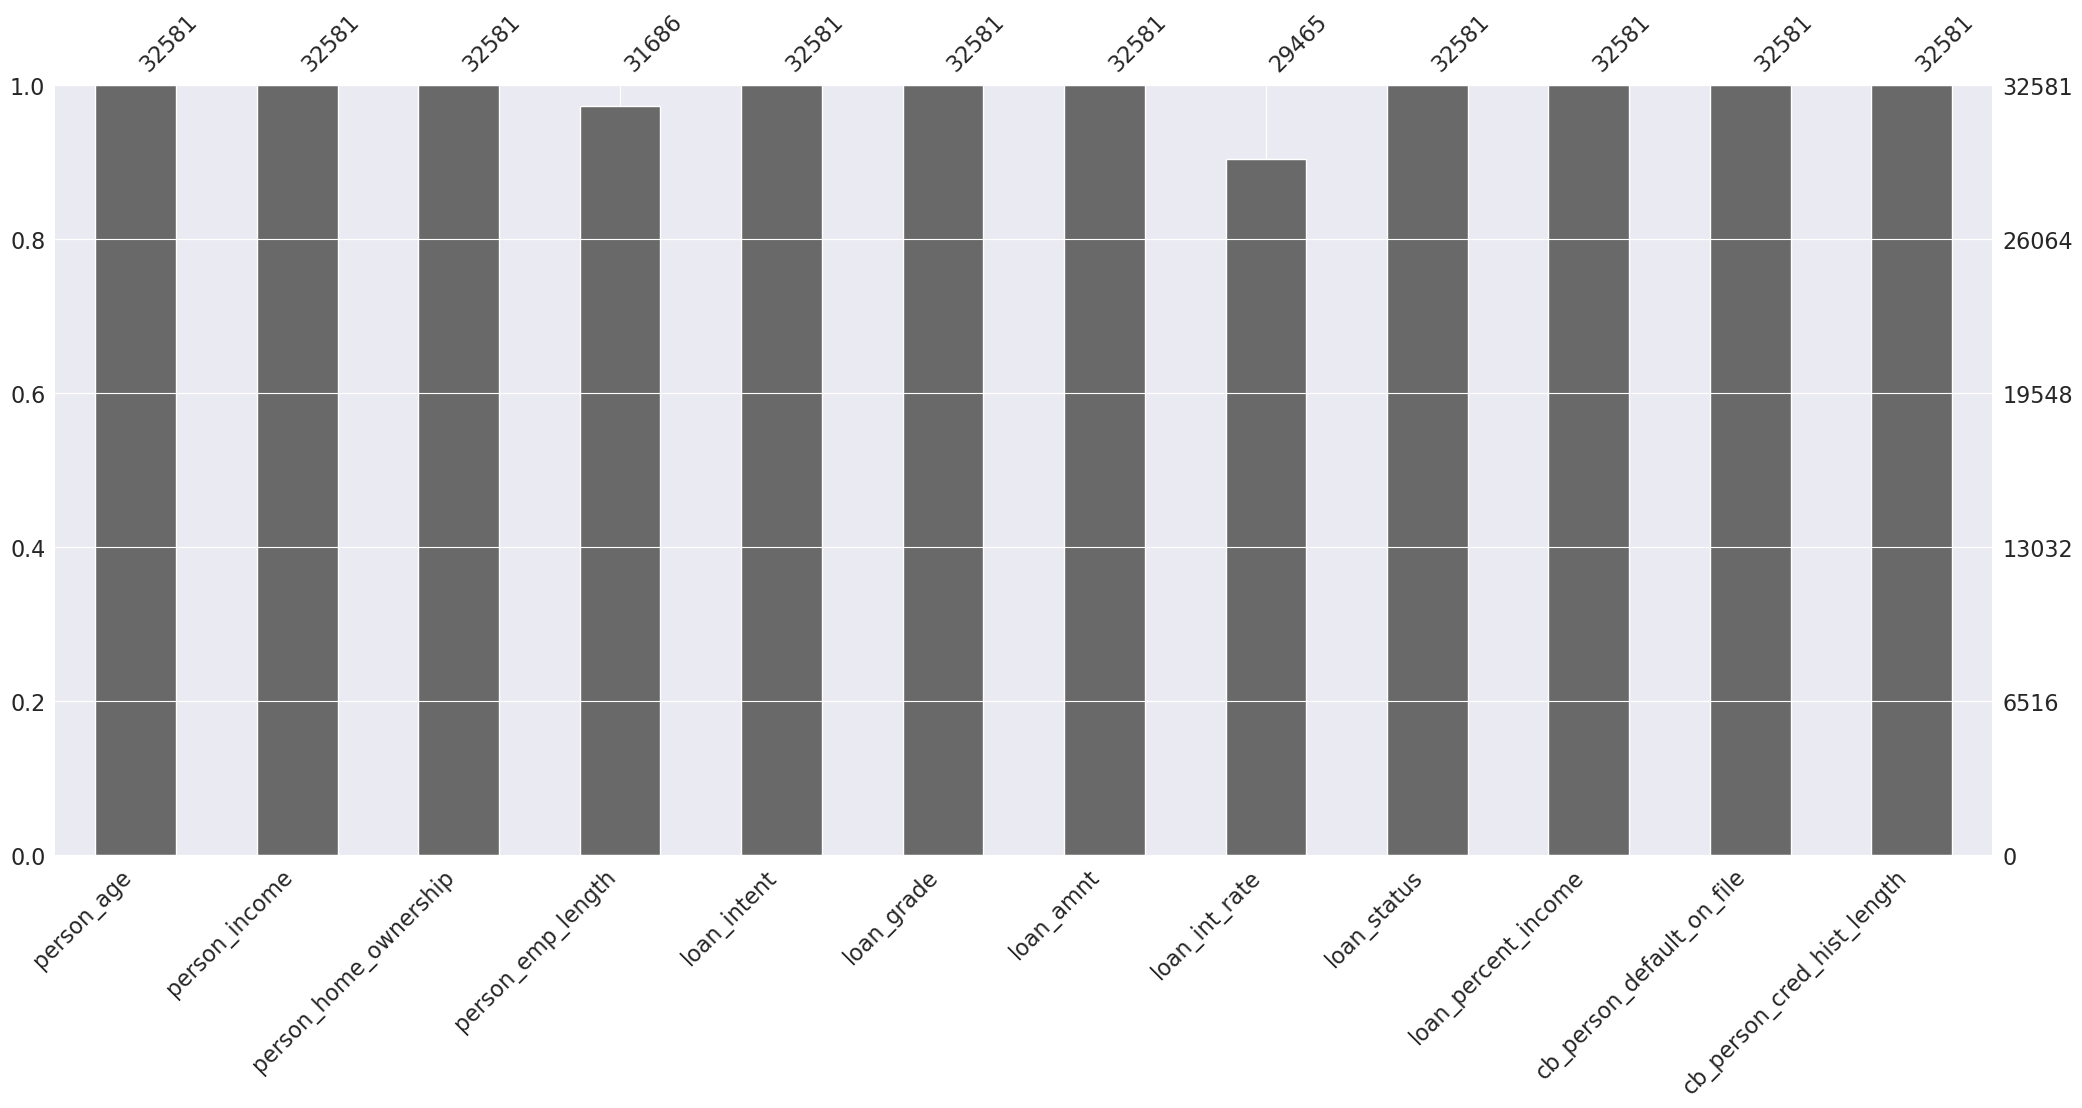

In [192]:
import missingno as msno
%matplotlib inline
msno.bar(data)

In [193]:
data['person_emp_length'] = data['person_emp_length'].fillna(data['person_emp_length'].median())
data['loan_int_rate'] = data['loan_int_rate'].fillna(data['loan_int_rate'].median())

As we can see there are missing data for *loan_int_rate* and *person_emp_length*.

Before we proceed to any manipulation of data let's first transform classes into numbers. There are multiple options ex: DummyVariables and Sigmoid methods FrequencyImputation and TargetImputation.

FrequencyImputation is not suited for any of the features because of approximately the same ratio. The TargetImputation gave me errors that I don't know how to solve therefor I will use working methods like DummyVariables and LabelEncoder. 

In [194]:
from sklearn.preprocessing import LabelEncoder

cb_person_default_on_file_values = ['N', 'Y']
encoder_cb_person = LabelEncoder()
encoder_cb_person.fit(cb_person_default_on_file_values)
data['cb_person_default_on_file'] = encoder_cb_person.transform(data['cb_person_default_on_file'])

loan_grade_values = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
encoder_loan_grade = LabelEncoder()
encoder_loan_grade.fit(loan_grade_values)
data['loan_grade'] = encoder_loan_grade.transform(data['loan_grade'])

data = pd.get_dummies(data, columns=["person_home_ownership", "loan_intent"], drop_first=True)

data.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22,59000,123.0,3,35000,16.02,1,0.59,1,3,False,False,True,False,False,False,True,False
1,21,9600,5.0,1,1000,11.14,0,0.10,0,2,False,True,False,True,False,False,False,False
2,25,9600,1.0,2,5500,12.87,1,0.57,0,3,False,False,False,False,False,True,False,False
3,23,65500,4.0,2,35000,15.23,1,0.53,0,2,False,False,True,False,False,True,False,False
4,24,54400,8.0,2,35000,14.27,1,0.55,1,4,False,False,True,False,False,True,False,False


### Exploratory Data Analysis

#### Distribution

In [195]:
data.columns.__len__()

18

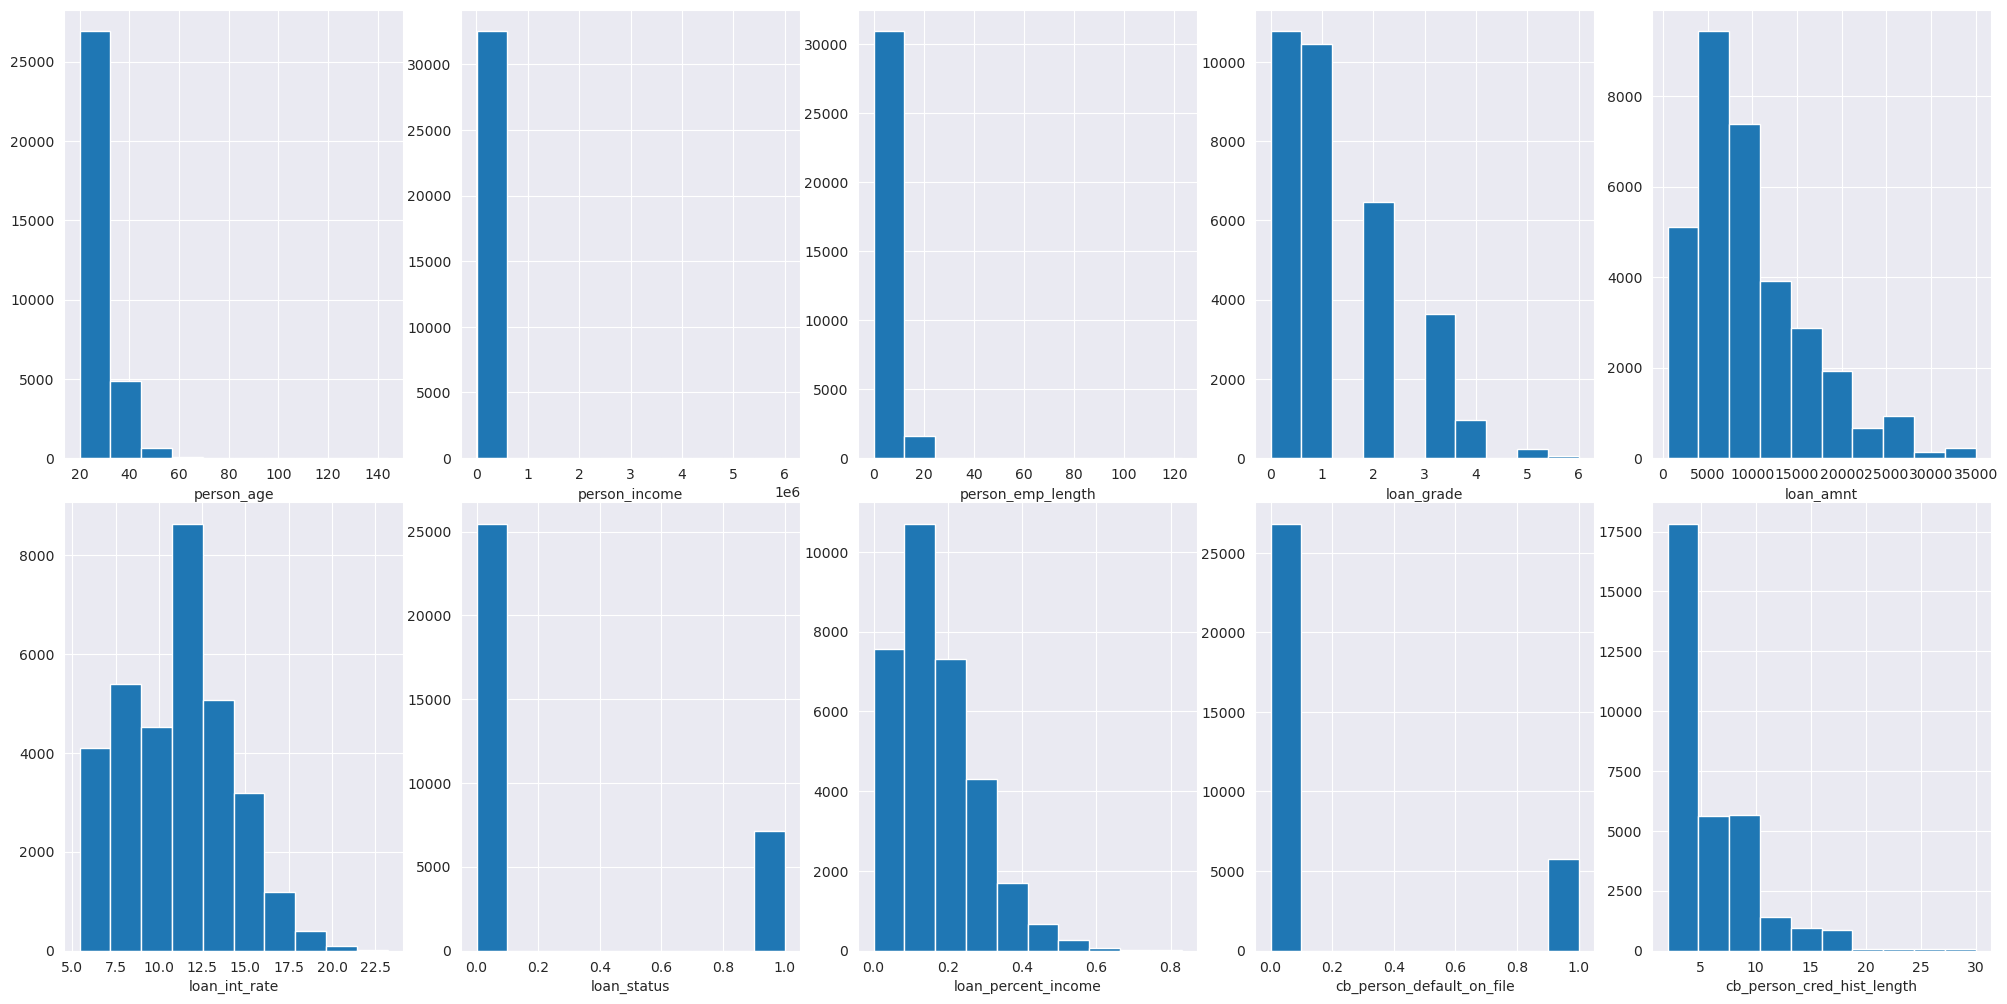

In [196]:
from matplotlib import pyplot as plt

columns_for_plotting = ['person_age', 'person_income', 'person_emp_length', 'loan_grade',
       'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length']


fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
fig.tight_layout() 
index = 0
axs = axs.flatten()
for i, column in enumerate(columns_for_plotting):
    axs[i].hist(data[column])
    axs[i].set_xlabel(column)

Again as mentioned earlier could be observed that there very distinguishable outliers, for example the one with 144 years the one with income over $6 * 10^{6}$, these outliers makes our graphs not so relevant. I propose to remove outliers and then to proceed to analyzing.

In [197]:
from sklearn.neighbors import LocalOutlierFactor

local_outlier = LocalOutlierFactor(contamination=0.1)
data['outliers'] = pd.Series(local_outlier.fit_predict(data))
data = data[data['outliers'] != -1]
nr_of_outliers = data[data['outliers'] == -1].__len__()
print(f"Nr of Outliers: {nr_of_outliers}")
data = data.drop('outliers', axis=1)

Nr of Outliers: 0


The *LocalOutlierFactor* didn't find any outliers which is a little strange, nevertheless let's try something else.

In [198]:
from sklearn.covariance import EllipticEnvelope

elliptic_outlier = EllipticEnvelope(contamination=0.5)
elliptic_outlier.fit(data)
outliers = pd.Series(elliptic_outlier.predict(data))
data['outliers'] = outliers
nr_of_outliers = data[data['outliers'] == -1].__len__()
print(f"Nr of Outliers: {nr_of_outliers}")
data = data[data['outliers'] != -1]
data = data.drop('outliers', axis=1)

Nr of Outliers: 13230


In [199]:
data.describe()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,16093.000000,1.609300e+04,16093.000000,16093.000000,16093.000000,16093.000000,16093.000000,16093.000000,16093.000000,16093.000000
mean,28.437084,6.221424e+04,4.689554,1.215125,8936.372957,10.991419,0.219101,0.168311,0.175294,6.258311
std,7.407762,4.965882e+04,4.028369,1.158012,5890.504582,3.073349,0.413650,0.105850,0.380230,4.808611
min,20.000000,4.000000e+03,0.000000,0.000000,500.000000,5.420000,0.000000,0.000000,0.000000,2.000000
25%,23.000000,3.700000e+04,2.000000,0.000000,5000.000000,8.490000,0.000000,0.090000,0.000000,3.000000
50%,26.000000,5.272800e+04,4.000000,1.000000,7500.000000,10.990000,0.000000,0.150000,0.000000,4.000000
75%,31.000000,7.400000e+04,7.000000,2.000000,12000.000000,13.110000,0.000000,0.230000,0.000000,9.000000
max,84.000000,1.782000e+06,41.000000,6.000000,35000.000000,22.060000,1.000000,0.780000,1.000000,30.000000


Didn't get the result i expected but at least i got rid of the mens over 100 years.

Now let's repeat the graphs above

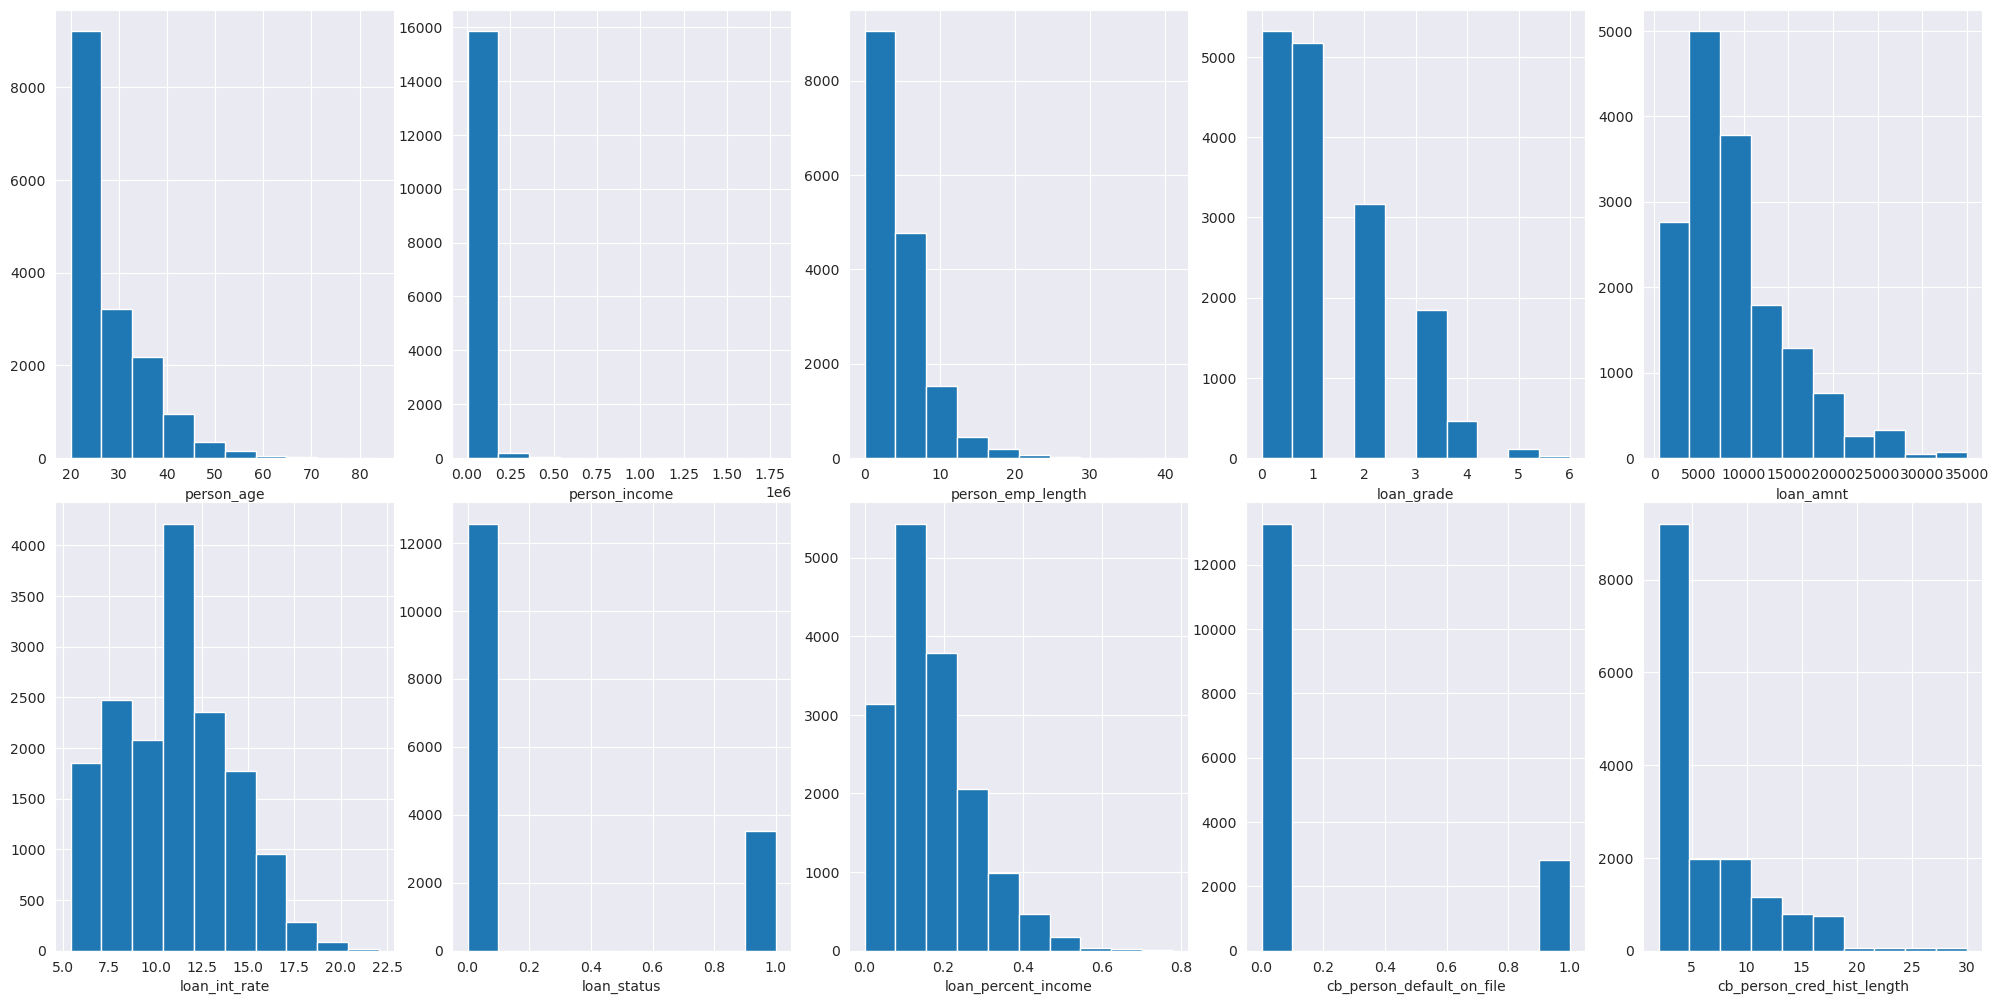

In [200]:
from matplotlib import pyplot as plt

columns_for_plotting = ['person_age', 'person_income', 'person_emp_length', 'loan_grade',
       'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length']


fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
fig.tight_layout() 
index = 0
axs = axs.flatten()
for i, column in enumerate(columns_for_plotting):
    axs[i].hist(data[column])
    axs[i].set_xlabel(column)

In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16093 entries, 19 to 32579
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_age                   16093 non-null  int64  
 1   person_income                16093 non-null  int64  
 2   person_emp_length            16093 non-null  float64
 3   loan_grade                   16093 non-null  int64  
 4   loan_amnt                    16093 non-null  int64  
 5   loan_int_rate                16093 non-null  float64
 6   loan_status                  16093 non-null  int64  
 7   loan_percent_income          16093 non-null  float64
 8   cb_person_default_on_file    16093 non-null  int64  
 9   cb_person_cred_hist_length   16093 non-null  int64  
 10  person_home_ownership_OTHER  16093 non-null  bool   
 11  person_home_ownership_OWN    16093 non-null  bool   
 12  person_home_ownership_RENT   16093 non-null  bool   
 13  loan_intent_EDUCATIO

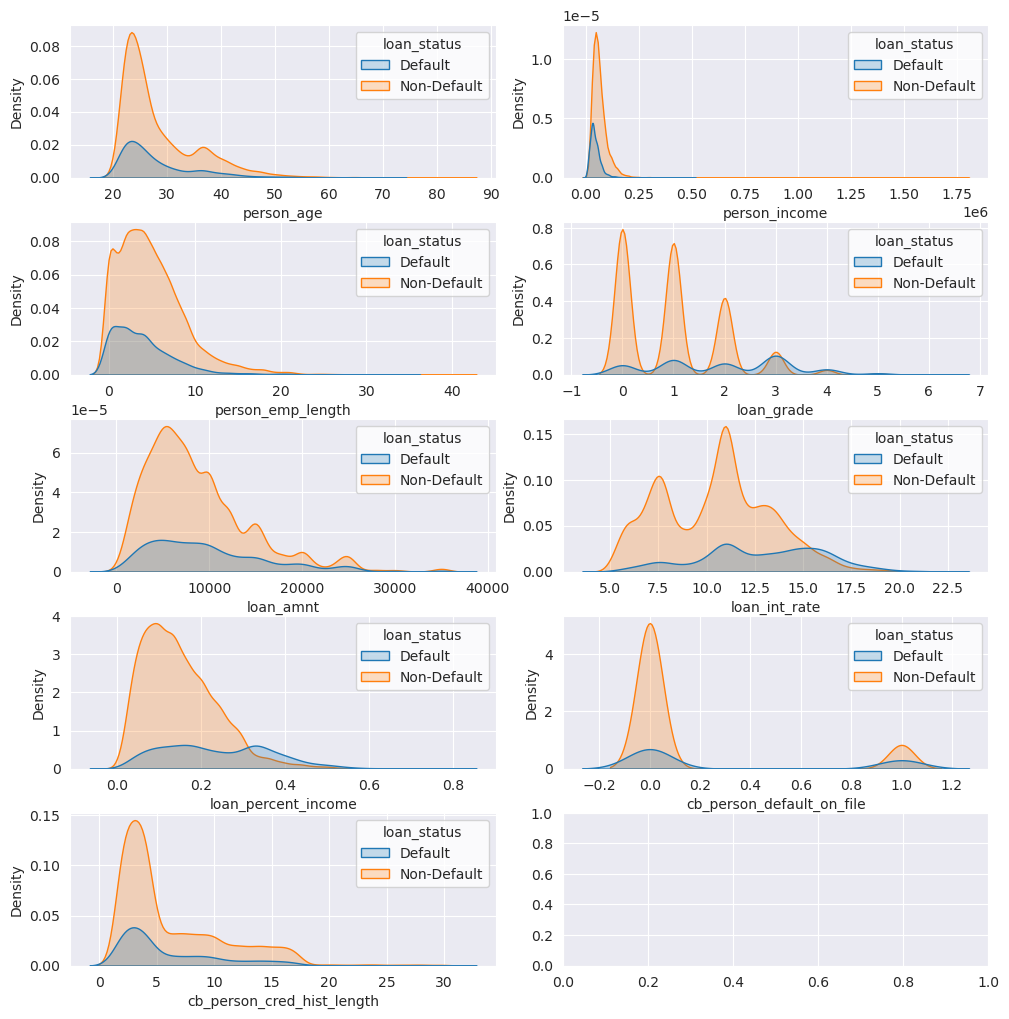

In [202]:
import seaborn as sns

fig, axes = plt.subplots(5, 2, figsize=(10, 10))
fig.tight_layout() # tight_layout() makes the layout.... less tight. hmmmm......

category = data.copy() 
category["loan_status"] = category["loan_status"].astype(str) # a warning raises if the 
category.loc[category["loan_status"] == "1", "loan_status"] = "Default"
category.loc[category["loan_status"] == "0", "loan_status"]  = "Non-Default"

axes = axes.flatten()
with sns.axes_style("whitegrid"):
    for i, column in enumerate(pd.DataFrame(columns=columns_for_plotting).drop('loan_status', axis=1)):
        sns.kdeplot(category, x=column , hue="loan_status", fill=True, ax = axes[i])

I will try to extract conclusions for every graph in sequence from left-to-right from top-to-bottom.

- Younger people tend to fail their payments loans more often than the ones that have already jobs or some experience.
- People with a lower income also tends to fail the payment of the loans.
- People with less employment length tends to fail their loans.
- The greater the grade the more possible is that they will not fail their payment obligation. Which is clearly seen in the graph.
- The smaller the loan is the harder is to fail the payment.
- The greater is the loan_int_rate the greater is the possibility that it will fail.
- The more percent from the income is the loan the greater is that the person will fail to pay it.
- Here is unclear because it really does not matter because both are equal in failing the payment.
- Person Credit History Length also  don't matter because there are equal failings and not failings.

Now I would like to do the same graph but for the features with classes especially the *home_ownership* and *loan_intent*.

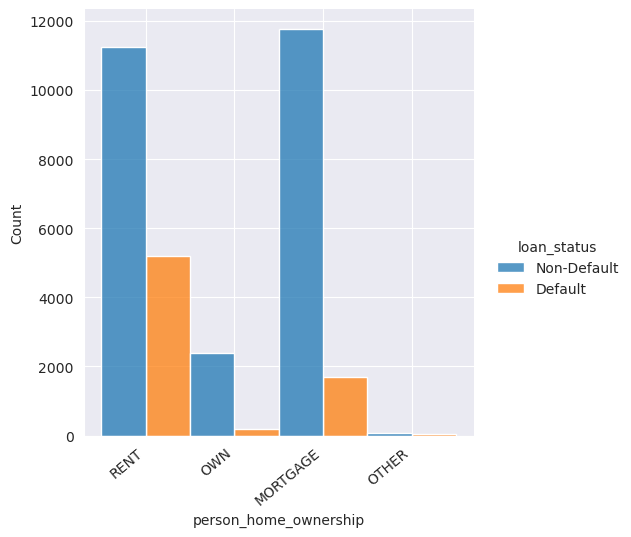

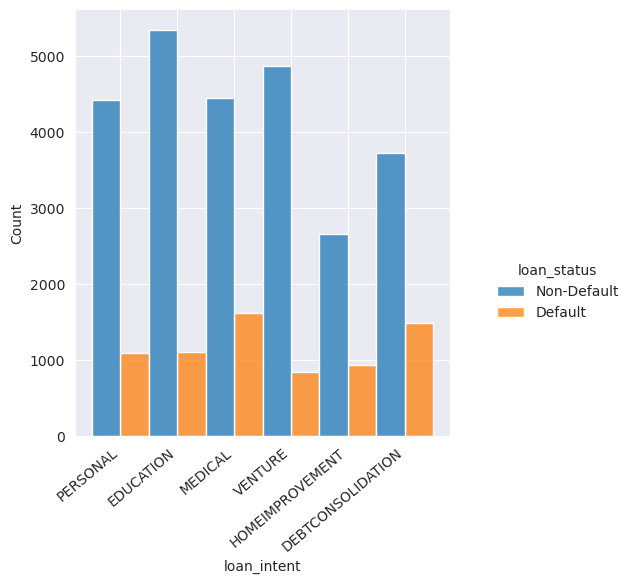

In [203]:
import seaborn as sns

category = original_data[['person_home_ownership', 'loan_intent', 'loan_status']].copy() 
category["loan_status"] = category["loan_status"].astype(str) # a warning raises if the 
category.loc[category["loan_status"] == "1", "loan_status"] = "Default"
category.loc[category["loan_status"] == "0", "loan_status"]  = "Non-Default"

for i, column in enumerate(category.columns[:-1]):
    ax = sns.displot(category, x=column, hue="loan_status", multiple="dodge", hue_order = ['Non-Default', 'Default'])
    ax.set_xticklabels(category[column].unique(),  rotation=40, ha="right")

As we could have seen from the first graph the people with their own house are more stable in terms of money and have lesser defaults. Those that rent tends more to fail their  payments. For the *loan_intent* we could say that there aren't any influences because all the categories have approximately the same values for default and non-default results.

#### Correlation

<Axes: >

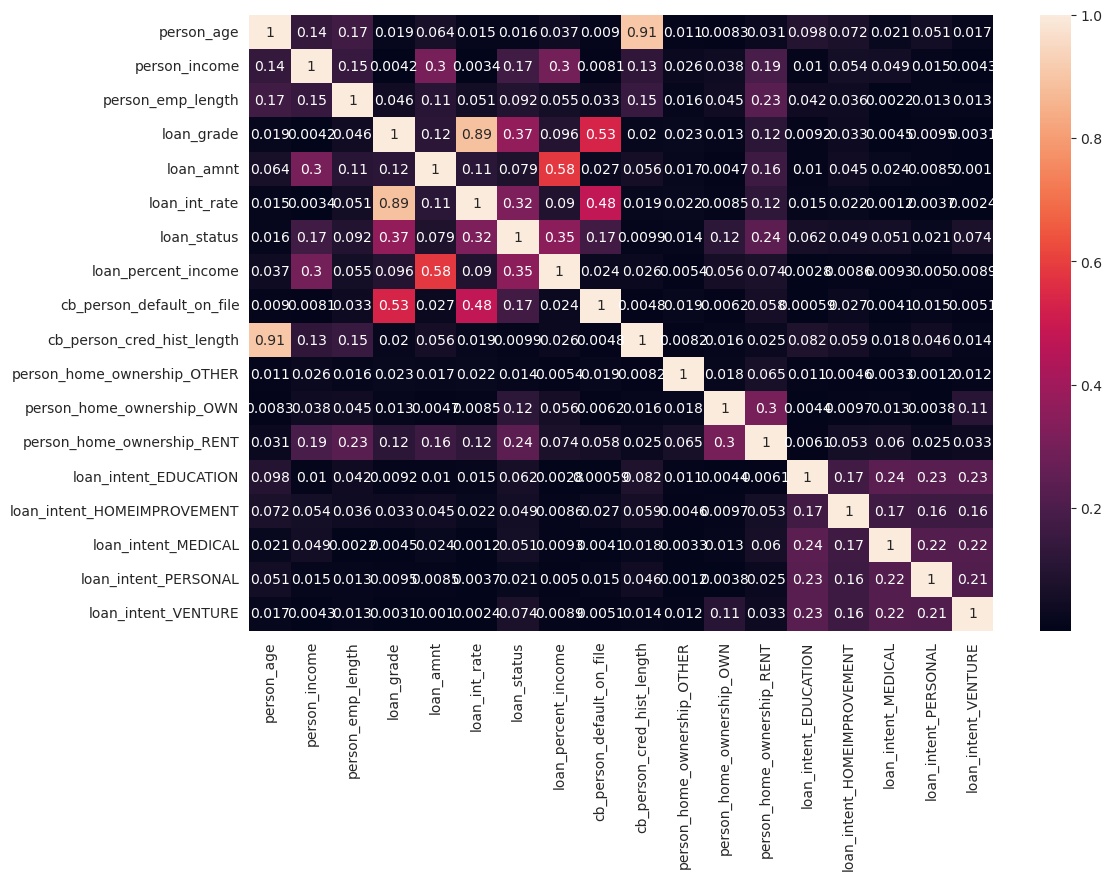

In [204]:
from matplotlib import pyplot as plt
import seaborn as  sns

plt.figure(figsize=(12, 8))
plt.tight_layout()
sns.heatmap(abs(data.corr()), annot=True)

There is one thing I want to outline here, as the *loan_grade* is correlated mostly by the *loan_grade*, *loan_int_rate* and *loan_percent_income* thus it will be good to see the correlation of these items with others. Again as could be observed the *loan_grade* is determined by the *loan_int_rate* and default history of person.

### Training

At there are algorithms that are more sensitive to feature scaling and also there are others that are more susceptible I will separate a cell for each algorithm.

In [205]:
from sklearn.model_selection import train_test_split

loan_status = data['loan_status']
features = data.drop('loan_status', axis=1)
x_train, x_test, y_train, y_test = train_test_split(features, loan_status, test_size=0.4, random_state=26)

##### LogisticRegression

0.8508853681267474


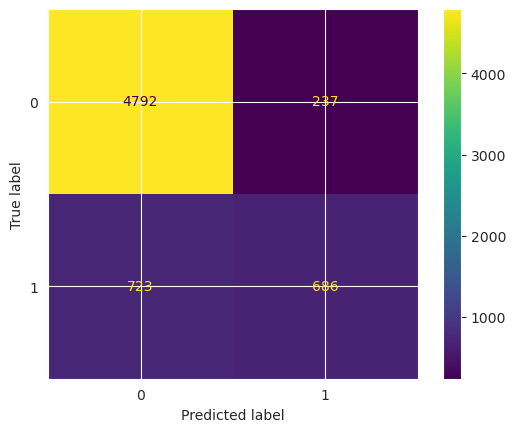

In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imperio import ZCATransformer
from sklearn.pipeline import Pipeline

pipeline_regression = Pipeline(
    [
        ('min_max_scaler', MinMaxScaler()),
        ('standard_scaler', StandardScaler()),
        # ('zca_transformer', ZCATransformer()),
        ('clf', LogisticRegression()),
    ]
) 

pipeline_regression.fit(x_train, y_train)

y_predicted = pipeline_regression.predict(x_test)
logistic_regression_accuracy = accuracy_score(y_test, y_predicted)
print(logistic_regression_accuracy)
ConfusionMatrixDisplay.from_predictions(y_test, y_predicted)

##### SVM

As the SVM is sensitive to any feature scaling we will don't apply anything.

0.9036968002485244


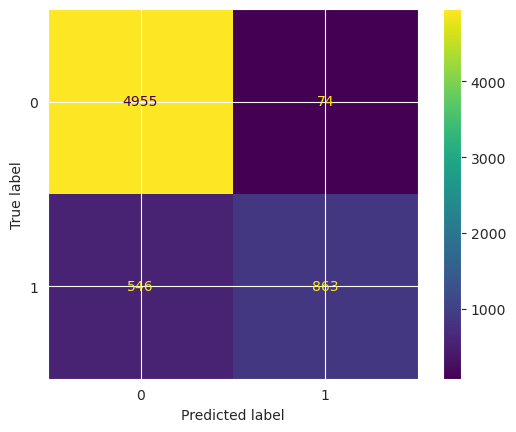

In [207]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imperio import ZCATransformer, BoxCoxTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

pipeline_svc = Pipeline(
    [
        ('min_max_scaler', MinMaxScaler()),
        ('standard_scaler', StandardScaler()),
        # ('zca_transformer', ZCATransformer()),
        # ('box_cox', BoxCoxTransformer()),
        ('clf', SVC()),
    ]
) 

pipeline_svc.fit(x_train, y_train)

y_predicted = pipeline_svc.predict(x_test)
svc_accuracy = accuracy_score(y_test, y_predicted)
print(svc_accuracy)
ConfusionMatrixDisplay.from_predictions(y_test, y_predicted)

##### NaiveBayes

Here I am curious how the Box-Cox transformation will influence the accuracy score.

0.8055296675986331


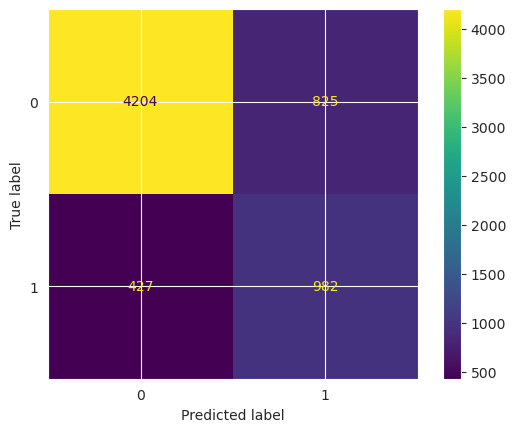

In [208]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imperio import ZCATransformer, BoxCoxTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB

pipeline_gaussian = Pipeline(
    [
        ('min_max_scaler', MinMaxScaler()),
        ('standard_scaler', StandardScaler()),
        # ('zca_transformer', ZCATransformer()),
        # ('box_cox', BoxCoxTransformer()),
        ('clf', GaussianNB()),
    ]
) 

pipeline_gaussian.fit(x_train, y_train)

y_predicted = pipeline_gaussian.predict(x_test)
gaussian_accuracy = accuracy_score(y_test, y_predicted)
print(gaussian_accuracy)
ConfusionMatrixDisplay.from_predictions(y_test, y_predicted)

##### RandomForest

This one are indifferent to any changes so will apply only 

0.9302578440509475


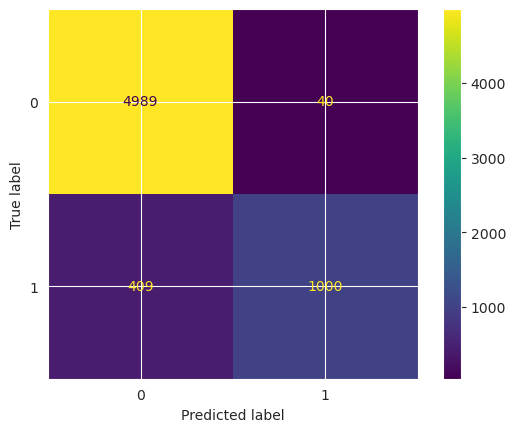

In [209]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imperio import ZCATransformer, BoxCoxTransformer
from sklearn.pipeline import Pipeline

pipeline_forest = Pipeline(
    [
        ('min_max_scaler', MinMaxScaler()),
        ('standard_scaler', StandardScaler()),
        # ('zca_transformer', ZCATransformer()),
        # ('box_cox', BoxCoxTransformer()),
        ('clf', RandomForestClassifier()),
    ]
) 

pipeline_forest.fit(x_train, y_train)

y_predicted = pipeline_forest.predict(x_test)
forest_accuracy = accuracy_score(y_test, y_predicted)
print(forest_accuracy)
ConfusionMatrixDisplay.from_predictions(y_test, y_predicted)

## Conclusion

Although these feature scaling are useful they are not always helping. For example for LogisticRegression in this case we get a much higher accuracy without any scaling. Also, the ZCATransformer and BoxCoxTransformer also don't give  significant increase i could say even a decrease. The iperio library with it's TargetImputation is not working (I get errors I don't know how to solve).